## Capstone 1 Project: Prediction of Churn for Telecom Customers (Data Wrangling)

<font color='green'>
This data set was downloaded from Kaggle (https://www.kaggle.com/blastchar/telco-customer-churn).  In this notebook, I am performing some initial exploratory data analysis and data cleaning.
</font>

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csvfile = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'

churn_df = pd.read_csv(csvfile)

churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [2]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [3]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Convert column TotalCharges from object to float and identify number of null entries

churn_df.TotalCharges = pd.to_numeric(churn_df.TotalCharges, errors='coerce')
null_list = churn_df[churn_df['TotalCharges'].isnull()].index.tolist()
print('There are', len(null_list), 'null entries in the TotalCharges column.')

There are 11 null entries in the TotalCharges column.


In [5]:
# Dropping null entries

churn_df = churn_df.dropna()

In [6]:
churn_df.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [7]:
churn_df.gender.value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [8]:
churn_df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [9]:
churn_df.MonthlyCharges.describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

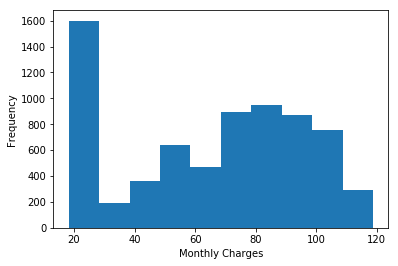

In [10]:
churn_df.MonthlyCharges.plot('hist')
_ = plt.xlabel('Monthly Charges')
plt.show()

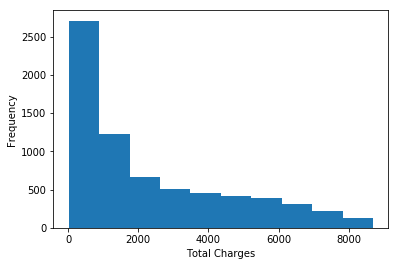

In [11]:
churn_df.TotalCharges.plot('hist')
_ = plt.xlabel('Total Charges')
plt.show()

The data set was fairly clean to begin with and did not require too much cleaning and wrangling.  There are 7043 observations with 21 features.  The following was done to clean the data:

- 11 observations contained null entries, which were dropped.  
- The TotalCharges column was changed from object to float